In [1]:
import matplotlib.image as mpimg
import os

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow import keras
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
import cv2

import warnings
warnings.filterwarnings('ignore')


C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
dataset = 'C:/Users/Admin/Documents/Downloads/archive/traffic_Data/DATA'
labelfile = pd.read_csv('C:/Users/Admin/Documents/Downloads/archive/labels.csv')

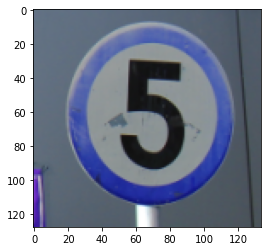

In [6]:
img = cv2.imread('C:/Users/Admin/Documents/Downloads/archive/traffic_Data/DATA/0/000_0001.png')
plt.imshow(img)

In [7]:
labelfile.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [8]:
labelfile.tail()

,ClassId,Name
53,53,Give Way
54,54,No stopping
55,55,No entry
56,56,Unknown7
57,57,Unknown8


In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
															subset='training',
															image_size=(
																224, 224),
															seed=123,
															batch_size=32)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
															subset='validation',
															image_size=(
																224, 224),
															seed=123,
															batch_size=32)


Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [10]:
class_numbers = train_ds.class_names
class_names = []
for i in class_numbers:
	class_names.append(labelfile['Name'][int(i)])


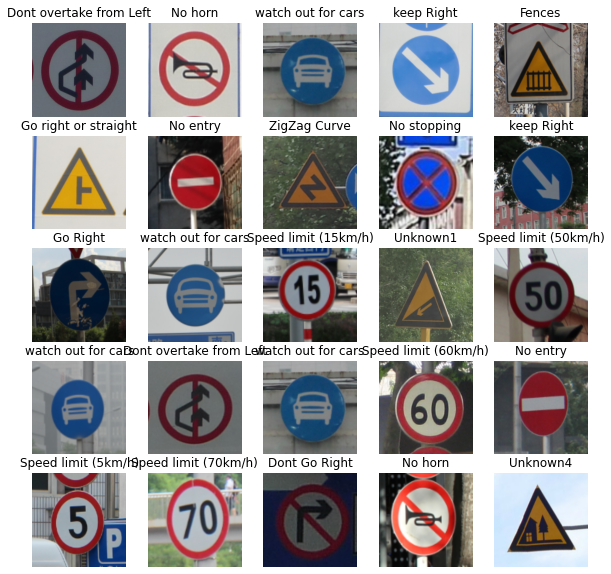

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
	for i in range(25):
		ax = plt.subplot(5, 5, i + 1)
		plt.imshow(images[i].numpy().astype("uint8"))
		plt.title(class_names[labels[i]])
		plt.axis("off")

plt.show()


In [12]:
data_augmentation = tf.keras.Sequential(
	[
		tf.keras.layers.experimental.preprocessing.RandomFlip(
			"horizontal", input_shape=(224, 224, 3)),
		tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
		tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
		tf.keras.layers.experimental.preprocessing.RandomFlip(
			mode="horizontal_and_vertical")
	]
)


In [13]:
model = Sequential()
model.add(data_augmentation)
model.add(Rescaling(1./255))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(labelfile), activation='softmax'))


In [14]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [15]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
			optimizer='adam',
			metrics=['accuracy'])



In [16]:
# Set callback functions to early stop training
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]
history = model.fit(train_ds,
				validation_data=val_ds,
				epochs=10,
				callbacks=mycallbacks)


Epoch 1/10
105/105 [==============================] - 196s 2s/step - loss: 3.1146 - accuracy: 0.2101 - val_loss: 2.3458 - val_accuracy: 0.3501
Epoch 2/10
105/105 [==============================] - 187s 2s/step - loss: 2.2589 - accuracy: 0.3588 - val_loss: 1.8103 - val_accuracy: 0.4484
Epoch 3/10
105/105 [==============================] - 188s 2s/step - loss: 1.9393 - accuracy: 0.4140 - val_loss: 1.5352 - val_accuracy: 0.5048
Epoch 4/10
105/105 [==============================] - 192s 2s/step - loss: 1.6714 - accuracy: 0.4823 - val_loss: 1.3345 - val_accuracy: 0.5923
Epoch 5/10
105/105 [==============================] - 193s 2s/step - loss: 1.5128 - accuracy: 0.5240 - val_loss: 1.2117 - val_accuracy: 0.6379
Epoch 6/10
105/105 [==============================] - 197s 2s/step - loss: 1.3823 - accuracy: 0.5561 - val_loss: 1.1451 - val_accuracy: 0.6619
Epoch 7/10
105/105 [==============================] - 243s 2s/step - loss: 1.2956 - accuracy: 0.5818 - val_loss: 0.9758 - val_accuracy: 0.6751

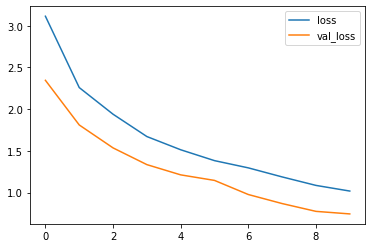

In [19]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper right')



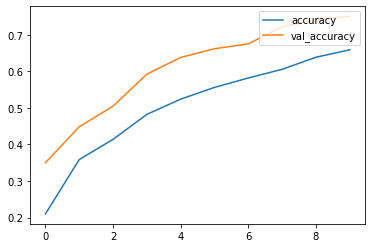

In [20]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')
